# Escuela Organización Industrial. 
### Plantilla de Entregas de Prácticas
---
*Consejos de uso de Google Colab:*

*   Puedes consultar la documentación sobre una función escribiendo **?** justo después de una función: *Ejemplo: np.maximum?*
*   Puedes ejecutar el contenido de una celda con el atajo de teclado **CTRL+ENTER**
*   Utiliza **TAB** cada vez que quieras autocompletar una llamada a una función.
*   Puedes ejecutar instrucciones de bash directamente desde el notebook usando **!** : *Ejemplo: !pip install tensorflow*

---


### 📣 Adjunta en cada bloque correspondiente el código de cada una de las prácticas evaluables, **de modo que pueda ser fácilmente ejecutado** para así poder comprobar su correcto funcionamiento.

💻 **Google Colab** es una herramienta que te permite ejecutar cuadernos Jupyter en la nube. Es decir, una herramienta a tu alcance desde cualquier dispositivo con el que poder programar en Python, teniendo todas las librerías más utilizadas del campo del Data Science y el Machine Learning y el hardware facilitado por Google de manera gratuita.

# Learning transfer 1

<br>
<img width=400px src='https://navigato.ru/content/news/image19093.jpg'>
<br>

Este dataset será uno que incluye imágenes de perros y gatos, y lo que tendremos que diseñar será un clasificador capaz de diferenciar entre ambas clases. Para ello, lo primero que deberás de hacer es ejecutar la celda que tienes abajo, que será la que te descargue el dataset con el que trabajaremos.

---

**Tarea:** El trabajo de hoy consistirá en lo siguiente:

- Carga tus datos para entrenar y para validar el modelo haciendo uso de los ***ImageDataGenerator(...)***, haciendo las **Aumentaciones de Datos** que consideres necesarias.
- Genera una arquitectura convolucional que aprenda a clasificar tus imágenes. Un *accuracy* superior al 70% será aceptable.
- Una vez tengas tu red entrenada, realiza el mismo trabajo con un modelo ya preentrenado (e.g. ResNet50) y utilizalo de la manera más conveniente para agilizar y mejorar el aprendizaje de tu problema. ¿Es mejor en términos de *accuracy*? ¿Y en tiempo de entrenamiento?

In [ ]:
# Ejecuta esto para descargarte el dataset. Podrás encontrar los archivos en el
# directorio correspondiente en la pestaña de Archivos en el menú de la izquierda.

!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip
  
!unzip /tmp/cats_and_dogs_filtered.zip

--2022-04-12 21:16:34--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.217.128, 173.194.218.128, 172.217.204.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.217.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   135MB/s    in 0.5s    

2022-04-12 21:16:35 (135 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]

Archive:  /tmp/cats_and_dogs_filtered.zip
   creating: cats_and_dogs_filtered/
  inflating: cats_and_dogs_filtered/vectorize.py  
   creating: cats_and_dogs_filtered/validation/
   creating: cats_and_dogs_filtered/train/
   creating: cats_and_dogs_filtered/validation/dogs/
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2127.jpg  
  inflating: cats_and_dogs_filtered/val

In [ ]:
import tensorflow as tf

from tensorflow.keras.models                import Sequential, Model
from tensorflow.keras.preprocessing.image   import ImageDataGenerator
from tensorflow.keras.utils                 import to_categorical
from tensorflow.keras.optimizers            import SGD
from tensorflow.keras.layers                import *
from tensorflow.keras.callbacks             import EarlyStopping

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import numpy as np

# Creamos el generador.
im_gen = ImageDataGenerator(rescale=1./255) #escalamos los datos

# Y lo cargamos con las imágenes de las carpetas.
train_data = im_gen.flow_from_directory('./cats_and_dogs_filtered/train')
test_data = im_gen.flow_from_directory('./cats_and_dogs_filtered/validation')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


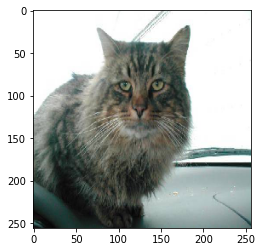

In [ ]:
# Visualizamos alguna de las imágenes de nuestro generador.
X, y = next(train_data)
plt.imshow(X[0])

In [ ]:
# CNN desde 0 para clasificar entre perros y gatos

image_size=256
output_size=2


input_image=Input(shape=(image_size,image_size,3))

x=Conv2D(16,3,2, 'same', activation='relu')(input_image)
x=Conv2D(32,3,2, 'same', activation='relu')(x)
x=Conv2D(64,3,2, 'same', activation='relu')(x)

x=Flatten()(x)

# x=Dense(512, activation='relu')(x)
output_layer=Dense(output_size,'softmax')(x)

model = Model(input_image, output_layer)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 65536)             0         
                                                                 
 dense (Dense)               (None, 2)                 131074    
                                                                 
Total params: 154,658
Trainable params: 154,658
Non-trainable

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(0.01),
              metrics=['acc'])

In [ ]:
# ---- EARLYSTOPPING ---- #
early_stop = EarlyStopping(monitor="val_acc", patience=3)

In [ ]:
model.fit(train_data, validation_data=test_data, callbacks=[early_stop], epochs=50)

Epoch 1/50
63/63 [==============================] - 48s 732ms/step - loss: 0.6943 - acc: 0.5185 - val_loss: 0.6839 - val_acc: 0.5770
Epoch 2/50
63/63 [==============================] - 39s 626ms/step - loss: 0.6830 - acc: 0.5640 - val_loss: 0.6803 - val_acc: 0.5660
Epoch 3/50
63/63 [==============================] - 38s 609ms/step - loss: 0.6788 - acc: 0.5805 - val_loss: 0.6748 - val_acc: 0.5710
Epoch 4/50
63/63 [==============================] - 38s 605ms/step - loss: 0.6738 - acc: 0.5815 - val_loss: 0.6718 - val_acc: 0.5850
Epoch 5/50
63/63 [==============================] - 39s 618ms/step - loss: 0.6671 - acc: 0.6110 - val_loss: 0.6669 - val_acc: 0.5860
Epoch 6/50
63/63 [==============================] - 38s 601ms/step - loss: 0.6627 - acc: 0.6040 - val_loss: 0.6652 - val_acc: 0.5870
Epoch 7/50
63/63 [==============================] - 38s 603ms/step - loss: 0.6555 - acc: 0.6100 - val_loss: 0.6661 - val_acc: 0.5820
Epoch 8/50
63/63 [==============================] - 38s 602ms/step - 

###**Modelo pre-entrenado (Feature Extraction).**

In [ ]:

from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

im_genx = ImageDataGenerator(preprocessing_function=preprocess_input)

train_datax  = im_genx.flow_from_directory('./cats_and_dogs_filtered/train')
test_datax  = im_genx.flow_from_directory('./cats_and_dogs_filtered/validation')

pretrained_resnet = ResNet50(include_top=False, weights='imagenet', input_shape=(250,250,3))
pretrained_resnet.trainable = False 

model1 = Sequential()

# Añadimos el modelo preentrenado como capa.
model1.add(pretrained_resnet)
# Añadimos la capa de salida customizada.
model1.add(Flatten())
model1.add(Dense(100, activation="relu"))
model1.add(Dense(2, activation="softmax"))

# ---- CONFIGURACIÓN DEL MODELO ---- #
model1.compile(optimizer=SGD(0.01), 
              loss="categorical_crossentropy", 
              metrics=["acc"])


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
pretrained_resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 250, 250, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 256, 256, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 125, 125, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
model1.fit(train_datax, validation_data=test_datax, batch_size=8, epochs=5)

Epoch 1/5
63/63 [==============================] - 655s 10s/step - loss: 0.9010 - acc: 0.9385 - val_loss: 0.0292 - val_acc: 0.9910
Epoch 2/5
20/63 [========>.....................] - ETA: 5:00 - loss: 0.0133 - acc: 0.9984

KeyboardInterrupt: ignored

# Learning transfer 2

<br>
<img width=400px src='https://github.com/anantgupta129/Image-Segmentation-Using-Pets-Dataset/raw/main/img/dataset.png'>
<br>

- Adapta el código de carga de datos del dataset Oxford Pets, para que ahora las imágenes de entrada de entrenamiento, se preprocesen utilizando la función correspondiente al modelo pre-entrenado a utilizar.

- Genera una arquitectura Encoder-Decoder, donde la parte del encoder utilice una red convolucional pre-entrenada truncada *(Resnet, MobileNet v2, etc)*. Comprueba si el rendimiento del entrenamiento mejora respecto al modelo sin pre-entrenar.

In [ ]:
!pip install git+https://github.com/tensorflow/examples.git

import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt



dataset, info = tfds.load('oxford_iiit_pet:3.*.*', with_info=True)

IMG_SHAPE  = 128
BATCH_SIZE = 32

# Método que procesará las imágenes y máscaras del dataset.
def load_image(datapoint):
  
  input_image = tf.image.resize(datapoint['image'], (IMG_SHAPE, IMG_SHAPE))
  input_mask = tf.image.resize(datapoint['segmentation_mask'], (IMG_SHAPE, IMG_SHAPE))
  input_image = tf.cast(input_image, tf.float32) / 255.0
  input_mask -= 1

  return input_image, input_mask

# Procesamos cada datapoint con el método creado.
train_images = dataset['train'].map(load_image).batch(BATCH_SIZE)
test_images  = dataset['test'].map(load_image).batch(BATCH_SIZE)

# Visualizamos las imágenes cargadas.
for images, masks in train_images.take(1):
  for i in range(5):
    plt.imshow(tf.keras.utils.array_to_img(images[i]))
    plt.axis('off')
    plt.show()
    plt.matshow(tf.keras.utils.array_to_img(masks[i]))
    plt.axis('off')
    plt.show()

In [ ]:
from tensorflow.keras import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
c

from tensorflow.keras.callbacks import EarlyStopping

# Capa de entrada de datos.
inp = Input(shape=(IMG_SHAPE, IMG_SHAPE, 3))

enc_1 = Conv2D(filters=16, kernel_size=5, strides=2, padding="same", activation="relu")(inp)
enc_2 = Conv2D(filters=32, kernel_size=5, strides=2, padding="same", activation="relu")(enc_1)
enc_3 = Conv2D(filters=64, kernel_size=5, strides=2, padding="same", activation="relu")(enc_2)

dec_1 = Conv2DTranspose(filters=32, kernel_size=5, strides=2, padding="same", activation="relu")(enc_3)
dec_2 = Conv2DTranspose(filters=16, kernel_size=5, strides=2, padding="same", activation="relu")(dec_1)
dec_3 = Conv2DTranspose(filters=3,  kernel_size=5, strides=2, padding="same", activation="softmax")(dec_2)

model = Model(inputs=inp, outputs=dec_3)

early_stop = EarlyStopping(monitor="val_acc", patience=5)

model.compile(Adam(), loss=SparseCategoricalCrossentropy(), metrics=["acc"])
model.fit(train_images, validation_data=test_images, epochs=10, callbacks=[early_stop])

###**Modelo pre-entrenado**

In [ ]:
pretrained_resnet = ResNet50(include_top=False, weights='imagenet', input_shape=(IMG_SHAPE,IMG_SHAPE,3))
pretrained_resnet.trainable = False 

In [ ]:
pretrained_resnet.summary()

In [ ]:
z = 20

#Encoder
input_pretrained_layer  = pretrained_resnet.input
pretrained_resnet
output_pretrained_layer = pretrained_resnet.output
enc_4 = Flatten()(output_pretrained_layer)
dense_enc = Dense(z)(enc_4)

#Decoder
input_decoder = Input(shape = z)

dense_dec = Dense(16384)(input_decoder)
reshape = Reshape((16,16,64))(dense_dec)
dec_1 = Conv2DTranspose(filters=32, kernel_size=5, strides=2, padding="same", activation="relu")(reshape)
dec_2 = Conv2DTranspose(filters=16, kernel_size=5, strides=2, padding="same", activation="relu")(dec_1)
dec_3 = Conv2DTranspose(filters=3,  kernel_size=5, strides=2, padding="same", activation="softmax")(dec_2)

In [ ]:
# Creamos modelos separados
encoder_model = Model(inputs = input_pretrained_layer, outputs = dense_enc)
decoder_model = Model(inputs = input_decoder, outputs = dec_3)

In [ ]:
# Unimos ambos modelos para crear el autoencoder
head_autoencoder = encoder_model(input_pretrained_layer)
body_autoencoder = decoder_model(head_autoencoder)

autoencoder = Model(inputs=input_pretrained_layer, outputs=body_autoencoder)

In [ ]:
early_stop = EarlyStopping(monitor="val_acc", patience=5)

autoencoder.compile(Adam(), loss=SparseCategoricalCrossentropy(), metrics=["acc"])
autoencoder.fit(train_images, validation_data=test_images, epochs=100, callbacks=[early_stop])

# Learning transfer. Pre-trained transformers

<img width="900px" src=https://miro.medium.com/fit/c/1838/551/1*PMlT7m9nMigseMmJcB4ddw.png>

**Tarea:** Vamos a comprobar cómo podemos hacer uso de cualquier modelo que nos ofrezca Hugging Face, y cómo podemos hacer pruebas con él desde nuestro código.

- **Busca en el hub un modelo conocido como T5.** Aprovecha para leer cuál es el origen de este modelo, qué aporta, probar la API ya disponible desde la web y el resto de información necesaria para saber con qué estamos trabajando.

- **Carga el modelo T5 en tu código**, junto a su tokenizador para transformar el input y generar un resultado con el modelo. Para esto te interesará buscar en la documentación información sobre *T5Tokenizer* y *TFT5ForConditionalGeneration*

In [ ]:
!pip install transformers
!pip install sentencepiece

In [ ]:
from transformers import T5Tokenizer, T5ForConditionalGeneration

input_text = "translate English to French: Language models are really impresive on their performance."

tokenizer = T5Tokenizer.from_pretrained("t5-small")
model = T5ForConditionalGeneration.from_pretrained("t5-small")

input_ids = tokenizer(input_text, return_tensors="pt").input_ids
outputs = model.generate(input_ids)

print(tokenizer.decode(outputs[0], skip_special_tokens=True))